In [8]:
import torch
import torch.nn as nn
import torchvision

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
!curl -L -o data.zip https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  8 97.7M    8 8282k    0     0  5316k      0  0:00:18  0:00:01  0:00:17 5316k
 40 97.7M   40 40.0M    0     0  15.2M      0  0:00:06  0:00:02  0:00:04 29.7M
 78 97.7M   78 76.3M    0     0  21.4M      0  0:00:04  0:00:03  0:00:01 34.1M
100 97.7M  100 97.7M    0     0  21.9M      0  0:00:04  0:00:04 --:--:-- 30.9M


In [15]:
import zipfile
from pathlib import Path
with zipfile.ZipFile("data.zip", "r") as z:
    z.extractall("data") 
print("Files extracted to:", Path("data").resolve())

Files extracted to: C:\Users\Minmin.Yuan\data


In [10]:
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [11]:
path = './data/data/train/curly/'
name = '00cbad1ffe22d900018e5a2e7376daed4.jpg'

full_name = f'{path}/{name}'
test_image= torchvision.io.read_image(full_name)
test_image.shape

torch.Size([3, 768, 614])

In [12]:
import matplotlib.image as mpimg

img = mpimg.imread(full_name)
img.shape

(768, 614, 3)

In [13]:
from PIL import Image
img = Image.open(full_name).convert('RGB')

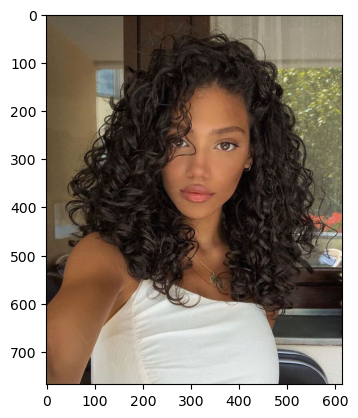

In [14]:
plt.imshow(img)

In [18]:
import torchvision.transforms as transforms

resize = transforms.Compose([transforms.Resize(size = (200,200))])

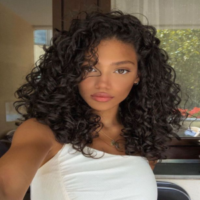

In [19]:
img = resize(img)
img

In [20]:
x = np.array(img)
x

array([[[ 95,  86,  71],
        [ 97,  88,  73],
        [ 97,  88,  73],
        ...,
        [146, 141, 119],
        [146, 141, 119],
        [148, 143, 121]],

       [[ 97,  88,  70],
        [ 99,  89,  72],
        [ 99,  88,  72],
        ...,
        [148, 143, 121],
        [147, 142, 120],
        [148, 143, 121]],

       [[ 99,  88,  66],
        [101,  89,  69],
        [100,  88,  71],
        ...,
        [149, 144, 122],
        [147, 142, 120],
        [148, 143, 121]],

       ...,

       [[116,  82,  57],
        [118,  84,  59],
        [118,  84,  59],
        ...,
        [220, 219, 214],
        [220, 219, 214],
        [222, 221, 216]],

       [[117,  83,  58],
        [119,  85,  60],
        [119,  85,  60],
        ...,
        [220, 219, 214],
        [222, 221, 216],
        [221, 220, 215]],

       [[119,  85,  60],
        [120,  86,  61],
        [119,  85,  60],
        ...,
        [219, 218, 213],
        [220, 219, 214],
        [221, 220, 215]]

### Define Model

In [39]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1=nn.Conv2d(
            in_channels=3,
            out_channels=32,
            kernel_size = 3,
            stride = 1,
            padding = 0)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride =2)

        self.flatten_dim = 32*99*99

        self.fc1 = nn.Linear(self.flatten_dim, 64)
        self.fc_out = nn.Linear(64, 1)


    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(-1, self.flatten_dim)
        x = self.fc1(x)
        x = self.fc_out(x)

        return x

In [40]:
model = CNN()

optimizer = torch.optim.SGD(model.parameters(), lr=0.002, momentum=0.8)

criterion = nn.BCEWithLogitsLoss()


In [43]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params}")

Total parameters: 20073473


### Training epochs

In [77]:
train_transforms = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ) # ImageNet normalization
])

In [31]:
from torchvision import datasets

In [62]:
train = datasets.ImageFolder('./data/data/train', transform=train_transforms)

In [63]:
from torch.utils.data import random_split, DataLoader

val_size = int(0.2 * len(train_dataset))
train_size = len(train_dataset) - val_size

train_dataset, validation_dataset = random_split(train, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=20, shuffle=False)

In [78]:
test_dataset  = torchvision.datasets.ImageFolder('./data/data/test',  transform=train_transforms)
test_loader = DataLoader(test_dataset, batch_size=20, shuffle=False)

In [56]:
import torch
print(torch.cuda.is_available())   # True = GPU can be used
print(torch.version.cuda)          # CUDA version PyTorch was built with
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


True
12.6
NVIDIA RTX PRO 500 Blackwell Generation Laptop GPU


In [53]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [57]:
device = torch.device("cpu")
model.to(device)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=313632, out_features=64, bias=True)
  (fc_out): Linear(in_features=64, out_features=1, bias=True)
)

In [64]:
num_epochs = 10
history = {'acc': [], 'loss': [], 'val_acc': [], 'val_loss': []}

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        labels = labels.float().unsqueeze(1) # Ensure labels are float and have shape (batch_size, 1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        # For binary classification with BCEWithLogitsLoss, apply sigmoid to outputs before thresholding for accuracy
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = correct_train / total_train
    history['loss'].append(epoch_loss)
    history['acc'].append(epoch_acc)

    model.eval()
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            labels = labels.float().unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * images.size(0)
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_epoch_loss = val_running_loss / len(validation_dataset)
    val_epoch_acc = correct_val / total_val
    history['val_loss'].append(val_epoch_loss)
    history['val_acc'].append(val_epoch_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}, "
          f"Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}")

Epoch 1/10, Loss: 0.4675, Acc: 0.7859, Val Loss: 0.5848, Val Acc: 0.6937
Epoch 2/10, Loss: 0.3675, Acc: 0.8313, Val Loss: 0.4651, Val Acc: 0.7500
Epoch 3/10, Loss: 0.3215, Acc: 0.8609, Val Loss: 0.4782, Val Acc: 0.7312
Epoch 4/10, Loss: 0.2472, Acc: 0.8984, Val Loss: 0.8272, Val Acc: 0.6188
Epoch 5/10, Loss: 0.2327, Acc: 0.9078, Val Loss: 0.4908, Val Acc: 0.7250
Epoch 6/10, Loss: 0.1462, Acc: 0.9578, Val Loss: 0.5020, Val Acc: 0.7562
Epoch 7/10, Loss: 0.0901, Acc: 0.9844, Val Loss: 0.6692, Val Acc: 0.7250
Epoch 8/10, Loss: 0.0979, Acc: 0.9672, Val Loss: 0.7188, Val Acc: 0.7063
Epoch 9/10, Loss: 0.0744, Acc: 0.9828, Val Loss: 0.5616, Val Acc: 0.7875
Epoch 10/10, Loss: 0.0451, Acc: 0.9906, Val Loss: 0.5502, Val Acc: 0.7562


In [65]:
median_acc = np.median(history['acc'])
print("Median training accuracy:", median_acc)

Median training accuracy: 0.9328125


In [66]:
std_loss = np.std(history['loss'])
print("Standard deviation of training loss:", std_loss)

Standard deviation of training loss: 0.134911676618004


In [67]:
std_loss = torch.std(torch.tensor(history['loss']))
print("Standard deviation of training loss:", std_loss.item())

Standard deviation of training loss: 0.14220939576625824


### Data Augmentation

In [71]:
augmented_transform = transforms.Compose([
    transforms.RandomRotation(50),  # rotate randomly up to ±50 degrees
    transforms.RandomResizedCrop(
        200,                       # output size 200x200
        scale=(0.9, 1.0),          # scale of the crop relative to original
        ratio=(0.9, 1.1)           # aspect ratio of the crop
    ),
    transforms.RandomHorizontalFlip(),  # randomly flip horizontally
    transforms.ToTensor()               # convert to tensor (C,H,W)
])

In [72]:
from torch.utils.data import Subset

augmented_train_dataset = Subset(
    datasets.ImageFolder('./data/data/train', transform=augmented_transform),
    train_dataset.indices  # only augment the training subset
)

In [74]:
from torch.utils.data import ConcatDataset

combined_train_dataset = ConcatDataset([train_dataset, augmented_train_dataset])

In [75]:
train_loader = DataLoader(combined_train_dataset, batch_size=20, shuffle=True)

In [76]:
num_epochs_additional = 10  # train for 10 more epochs

for epoch in range(num_epochs_additional):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        labels = labels.float().unsqueeze(1)  # shape (batch_size, 1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        # For BCEWithLogitsLoss, apply sigmoid for accuracy
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct_train / total_train

    # Validation
    model.eval()
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            labels = labels.float().unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * images.size(0)
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_epoch_loss = val_running_loss / len(validation_loader.dataset)
    val_epoch_acc = correct_val / total_val

    # Append to history
    history['loss'].append(epoch_loss)
    history['acc'].append(epoch_acc)
    history['val_loss'].append(val_epoch_loss)
    history['val_acc'].append(val_epoch_acc)

    print(f"Epoch {epoch+1}/{num_epochs_additional}, "
          f"Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}, "
          f"Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}")

Epoch 1/10, Loss: 0.3786, Acc: 0.8070, Val Loss: 0.9069, Val Acc: 0.7000
Epoch 2/10, Loss: 0.3014, Acc: 0.8523, Val Loss: 0.7403, Val Acc: 0.7312
Epoch 3/10, Loss: 0.2902, Acc: 0.8594, Val Loss: 0.8728, Val Acc: 0.7250
Epoch 4/10, Loss: 0.2644, Acc: 0.8797, Val Loss: 0.8813, Val Acc: 0.6937
Epoch 5/10, Loss: 0.2636, Acc: 0.8734, Val Loss: 0.8392, Val Acc: 0.7250
Epoch 6/10, Loss: 0.2982, Acc: 0.8570, Val Loss: 0.8855, Val Acc: 0.7438
Epoch 7/10, Loss: 0.2698, Acc: 0.8734, Val Loss: 0.9646, Val Acc: 0.7375
Epoch 8/10, Loss: 0.2534, Acc: 0.8734, Val Loss: 0.8791, Val Acc: 0.7375
Epoch 9/10, Loss: 0.2475, Acc: 0.8836, Val Loss: 1.0345, Val Acc: 0.7688
Epoch 10/10, Loss: 0.2558, Acc: 0.8766, Val Loss: 1.9200, Val Acc: 0.6625


### Evaluation with test dataset

In [81]:
model.eval()  # set model to evaluation mode
test_running_loss = 0.0
correct_test = 0
total_test = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        labels = labels.float().unsqueeze(1)  # shape (batch_size, 1)

        outputs = model(images)
        loss = criterion(outputs, labels)

        # accumulate loss
        test_running_loss += loss.item() * images.size(0)

        # compute accuracy
        predicted = (torch.sigmoid(outputs) > 0.5).float()  # threshold 0.5 for binary classification
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

# Mean test loss
mean_test_loss = test_running_loss / len(test_dataset)

# Test accuracy
test_accuracy = correct_test / total_test

print("Mean test loss:", mean_test_loss)
print("Test accuracy:", test_accuracy)



Mean test loss: 1.6310570920581249
Test accuracy: 0.7114427860696517
